# Precision and Recall
Precision and recall is used to measure the performance of a classifier. Precision (P) is defined as the number of true positives (TP) divided by the sum of TP and false positives (FP):

$P = \frac{TP}{TP + FP}$

While the recall (R) is defined as the TP divided by the sum of TP and false negatives (FN):

$R = \frac{TP}{TP + FN}$

Both have values between 0 and 1.

As an example, lets say that you have developed a model that tries to predict if someone is infected with a virus that has spread all around the world (0 for not infected and 1 for infected). In order to measure the performance of your model you find a testing set (a group of people that you know for a fact if they are infected or not) and you use your model to predict who is infected. The results are the following:
```
Test_set    = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Predictions = [0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
```
The model’s precision and recall is:
```
P = 3/(3+1) = 0.75
R = 3/(3+2) = 0.6
```

However, your model, in this case a classifier, besides giving you a prediction (0s and 1s), it can also give you a probability (a number between 0 and 1). In that case you can choose a threshold (a number between 0 and 1) to create your predictions by assigning 1 to any probability equal or greater than your threshold, and 0 otherwise. For example, if you choose your threshold to be 0.6 and you have the following set of probabilities:
```probs = [0.3, 0.65, 0.70, 0.2]```,
then your predictions would be:
```predictions = [0, 1, 1, 0]```


Having the probabilities allows you to plot curves for precision and recall as a function of the threshold. This provides an easy way to have a good understanding of how your model performs, and make a good decision about which threshold you should pick.

As an example, we are going to generate two fake lists: one for the true target values (the testing set), and a second one with the model probabilities. This is done using the function ```generate_dummy_probs_true_y()```, located in the **mlb_misc_functions.py** file, as follows:

In [1]:
#Import functions
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
import matplotlib.pyplot as plt
from mlb_misc_functions import generate_dummy_probs_true_y 

# Precision and recall scores

In [2]:
target = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
predic = [1, 1, 1, 1, 0, 0, 0, 0, 0, 1]

precision = precision_score(target, predic)
recall = recall_score(target, predic)

print(precision)
print(recall)

0.8
0.5


# Precision and recall curves

In [3]:
#create dummy data
target, probs = generate_dummy_probs_true_y()

print(target[:3])
print(probs[:3])

[0, 0, 1]
[0.18222920170226942, 0.44350813306820425, 0.9527310069762089]


In [4]:
#Obtain precision recall and thresholds
precision, recall, thresholds = precision_recall_curve(target, probs)

print(precision[:3])
print(recall[:3])
print(thresholds[:3])

[0.49924977 0.52966776 0.52972399]
[1.         0.99979964 0.99979964]
[0.001      0.00116043 0.00120144]


In [5]:
#Check the number of elements in each list
print(len(precision))
print(len(recall))
print(len(thresholds))

8830
8830
8829


The lists ```precision``` and ```recall``` have one more element that the list ``` thresholds```! The reason is that the last two elements of these lists are artificially created or “fake”. In theory, when the threshold is 1, the precision and recall should have values of 1 and 0 respectively.

In [6]:
#check the last element of each list
print(precision[-1])
print(recall[-1])
print(thresholds[-1])

1.0
0.0
0.9999


In [7]:
precision = precision[:-1]
recall = recall[:-1]

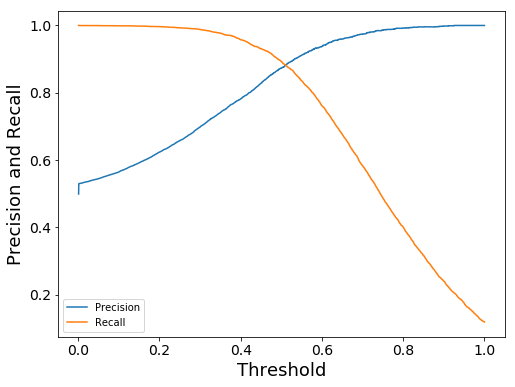

In [8]:
#plot precision and recall as function of threshold
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")

#Set the x and y axis label
plt.xlabel("Threshold", fontsize=18)
plt.ylabel("Precision and Recall", fontsize=18)

#Other parameters
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

That’s how typical precision recall curves look like: as recall decreases precision increases. The figure shows that close to ```threshold = 0```, recall is almost 1 and the precision is low. Meaning that while you will catch all the positive cases, you will be wrong a lot. On the other hand, when ```threshold = 1``` precision goes to 1 and recall goes to 0, meaning that while you will miss almost all the positive cases, you are highly likely to be right in the few cases you prediction comes back as 1.

Precision sometimes is plotted as a function of recall, or vice versa, the plot is shown below:

In [ ]:
plt.plot(precision, recall)
plt.xlabel("Precision", fontsize=18)
plt.ylabel("Recall", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Final Words

Precision and recall curves have an inverse relation, as one increases the other one decreases. This is always the case and is the tradeoff that all classifiers have. Therefore, you need to pick up a precision-recall pair based on your needs. 

Going back to our model that tries to predict if someone is infected with a virus or not, if you are interested in having a high probability of being right when your model predicts that someone is infected, you need to select a high threshold for your model. On the other hand, if your goal is that your model catches most of the infected individuals, you need to set a low threshold.

I recommend you reading the documentation of the ```precision_recall_curve()``` function [here]( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html).